In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
tipdf = pd.read_csv('../data/tips.csv')
tipdf.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


In [3]:
tipdf.loc['2502020']=np.nan
tipdf.tail()

,total_bill,tip,sex,smoker,day,time,size
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0
244,25.34,NaN,NaN,NaN,NaN,NaN,NaN
2502020,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# tipdf 차원 조회
tipdf.ndim
np.ndim(tipdf)

2

In [5]:
# tipdf의 크기 조회...  튜플로 리턴
tipdf.shape
np.shape(tipdf)

(246, 7)

In [6]:
# tipdf의 데이터 조회
tipdf.head()
tipdf.tail()

,total_bill,tip,sex,smoker,day,time,size
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0
244,25.34,NaN,NaN,NaN,NaN,NaN,NaN
2502020,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# tipdf의 컬럼 조회
tipdf.info() # info()는 print되어 나옴
tipdf.columns

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 0 to 2502020
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  245 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [8]:
# tipdf 정렬
# 가장 팀이 높은 데이터 상위 3개를 출력
tipdf.sort_values(by='tip', ascending=False).head()

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3.0
212,48.33,9.00,Male,No,Sat,Dinner,4.0
23,39.42,7.58,Male,No,Sat,Dinner,4.0
59,48.27,6.73,Male,No,Sat,Dinner,4.0
141,34.30,6.70,Male,No,Thur,Lunch,6.0


In [9]:
# 사용자정의 함수
# total_bill과 tip과의 관련성
# 없는 함수이므로 만들어야 함

def get_tippct(df):
    return round(df['tip']/df['total_bill']*100,2)

In [10]:
# 컬럼 삽입
# tip_pct을 데이터에 넣기
tipdf['tip_pct']=get_tippct(tipdf)
tipdf.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2.0,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3.0,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3.0,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2.0,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4.0,14.68


In [11]:
# total_bill과 tip_pct를 내림차순으로 정렬
tipdf.sort_values(by=['total_bill','tip_pct'],ascending=[False,False]).head(7)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
170,50.81,10.00,Male,Yes,Sat,Dinner,3.0,19.68
212,48.33,9.00,Male,No,Sat,Dinner,4.0,18.62
59,48.27,6.73,Male,No,Sat,Dinner,4.0,13.94
156,48.17,5.00,Male,No,Sun,Dinner,6.0,10.38
182,45.35,3.50,Male,Yes,Sun,Dinner,3.0,7.72
102,44.30,2.50,Female,Yes,Sat,Dinner,3.0,5.64
197,43.11,5.00,Female,Yes,Thur,Lunch,4.0,11.60


In [12]:
# 조건부 슬라이싱
# Male를 정보를 따로 분리해서 tipdf_man이라는 df만들기
tipdf_man=tipdf[tipdf['sex']=='Male']
tipdf_man
tipdf_man.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
1,10.34,1.66,Male,No,Sun,Dinner,3.0,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3.0,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2.0,13.98
5,25.29,4.71,Male,No,Sun,Dinner,4.0,18.62
6,8.77,2.00,Male,No,Sun,Dinner,2.0,22.81


In [13]:
# 조건부 슬라이싱과 isin()
# isin()의 인자값은 list만 가능하다.\
# Female를 정보를 따로 분리해서 tipdf_woman이라는 df만들기
tipdf_woman=tipdf[tipdf['sex'].isin(['Female'])]
tipdf_woman

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2.0,5.94
4,24.59,3.61,Female,No,Sun,Dinner,4.0,14.68
11,35.26,5.00,Female,No,Sun,Dinner,4.0,14.18
14,14.83,3.02,Female,No,Sun,Dinner,2.0,20.36
16,10.33,1.67,Female,No,Sun,Dinner,3.0,16.17
...,...,...,...,...,...,...,...,...
226,10.09,2.00,Female,Yes,Fri,Lunch,2.0,19.82
229,22.12,2.88,Female,Yes,Sat,Dinner,2.0,13.02
238,35.83,4.67,Female,No,Sat,Dinner,3.0,13.03
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0,7.36


In [14]:
# 둘 다 상위 열 개만 출력
tipdf_man.head(10)
tipdf_woman.head(10)
tipdf.shape

(246, 8)

In [15]:
# 두 df 병합하기 - concat
# keys = 그룹핑 & 출처
tip_all = pd.concat([tipdf_man,tipdf_woman], keys=['Male','Female'])
tip_all

total_bill   tip     sex smoker   day    time  size  tip_pct
Male   1         10.34  1.66    Male     No   Sun  Dinner   3.0    16.05
       2         21.01  3.50    Male     No   Sun  Dinner   3.0    16.66
       3         23.68  3.31    Male     No   Sun  Dinner   2.0    13.98
       5         25.29  4.71    Male     No   Sun  Dinner   4.0    18.62
       6          8.77  2.00    Male     No   Sun  Dinner   2.0    22.81
...                ...   ...     ...    ...   ...     ...   ...      ...
Female 226       10.09  2.00  Female    Yes   Fri   Lunch   2.0    19.82
       229       22.12  2.88  Female    Yes   Sat  Dinner   2.0    13.02
       238       35.83  4.67  Female     No   Sat  Dinner   3.0    13.03
       240       27.18  2.00  Female    Yes   Sat  Dinner   2.0     7.36
       243       18.78  3.00  Female     No  Thur  Dinner   2.0    15.97

[244 rows x 8 columns]

In [16]:
tip_all.loc['2020']=np.nan
tip_all

,total_bill,tip,sex,smoker,day,time,size,tip_pct
"(Male, 1)",10.34,1.66,Male,No,Sun,Dinner,3.0,16.05
"(Male, 2)",21.01,3.50,Male,No,Sun,Dinner,3.0,16.66
"(Male, 3)",23.68,3.31,Male,No,Sun,Dinner,2.0,13.98
"(Male, 5)",25.29,4.71,Male,No,Sun,Dinner,4.0,18.62
"(Male, 6)",8.77,2.00,Male,No,Sun,Dinner,2.0,22.81
...,...,...,...,...,...,...,...,...
"(Female, 229)",22.12,2.88,Female,Yes,Sat,Dinner,2.0,13.02
"(Female, 238)",35.83,4.67,Female,No,Sat,Dinner,3.0,13.03
"(Female, 240)",27.18,2.00,Female,Yes,Sat,Dinner,2.0,7.36
"(Female, 243)",18.78,3.00,Female,No,Thur,Dinner,2.0,15.97


In [17]:
# row별 누락데이터 확인
tip_all.isnull().sum(axis=1)
tip_all.isna().sum(axis=1)

(Male, 1)        0
(Male, 2)        0
(Male, 3)        0
(Male, 5)        0
(Male, 6)        0
                ..
(Female, 229)    0
(Female, 238)    0
(Female, 240)    0
(Female, 243)    0
2020             8
Length: 245, dtype: int64

In [18]:
# 누락데이터 삭제
tip_all.dropna(how='any',inplace=True)
tip_all

,total_bill,tip,sex,smoker,day,time,size,tip_pct
"(Male, 1)",10.34,1.66,Male,No,Sun,Dinner,3.0,16.05
"(Male, 2)",21.01,3.50,Male,No,Sun,Dinner,3.0,16.66
"(Male, 3)",23.68,3.31,Male,No,Sun,Dinner,2.0,13.98
"(Male, 5)",25.29,4.71,Male,No,Sun,Dinner,4.0,18.62
"(Male, 6)",8.77,2.00,Male,No,Sun,Dinner,2.0,22.81
...,...,...,...,...,...,...,...,...
"(Female, 226)",10.09,2.00,Female,Yes,Fri,Lunch,2.0,19.82
"(Female, 229)",22.12,2.88,Female,Yes,Sat,Dinner,2.0,13.02
"(Female, 238)",35.83,4.67,Female,No,Sat,Dinner,3.0,13.03
"(Female, 240)",27.18,2.00,Female,Yes,Sat,Dinner,2.0,7.36


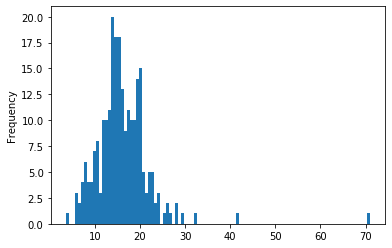

In [19]:
# 시각화
# 어떤 내용을 보기 편한 시각화인지 
# 히스토그램 = 분표 확인용...bins로 세심함을 조정할 수 있음
tipdf['tip_pct'].plot(kind='hist', bins=100)
plt.show()

In [29]:
mtip_male=tipdf_man['tip'].mean()
mtip_female=tipdf_woman['tip'].mean()

stdtip_male = tipdf_man['tip'].std()
stdtip_female=tipdf_woman['tip'].std()

counttip_male = tipdf_man['tip'].count()
counttip_female = tipdf_woman['tip'].count()

